In [53]:
import pandas as pd
df = pd.read_csv(r"email.csv")
df.head(10)

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam
5,AFE Model Casting Call,Model Casting Call\nThank you for taking the t...,not spam
6,AFE Model Casting Call,Model Casting Call\nThank you for taking the t...,not spam
7,Affordable American MBA degree ($180month),Today more than ever you need to upskill and r...,spam
8,"amazon.com.tr, action needed: Sign-in","\nLogo Image\nSenol Yildirim,\n\nSomeone signe...",not spam
9,Appen 9 Project Invite - A5655?Request detail ...,"Hi,\n\n \n\nThank you for your interest in joi...",not spam


In [55]:
import nltk
import pandas as pd
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load the dataset
data = pd.read_csv("email.csv")

# Get the set of English stopwords
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords from a given text
def remove_stopwords(text):
    # Split the text into words
    words = text.split()
    # Remove stopwords using a list comprehension
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a sentence
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Apply the function to each text entry in the dataset
data['text_without_stopwords'] = data['text'].apply(remove_stopwords)

# Display the top few rows of the DataFrame after removing stopwords
print("Top 10 Entries after Removing Stopwords:\n")
print(data[['text', 'text_without_stopwords']].head(10))



Top 10 Entries after Removing Stopwords:

                                                text  \
0  Hi James,\n\nHave you claim your complimentary...   
1  \nalt_text\nCongratulations, you just earned\n...   
2  Here's your GitHub launch code, @Mortyj420!\n ...   
3  Hello,\n \nThank you for contacting the Virtua...   
4  Hey Prachanda Rawal,\n\nToday's newsletter is ...   
5  Model Casting Call\nThank you for taking the t...   
6  Model Casting Call\nThank you for taking the t...   
7  Today more than ever you need to upskill and r...   
8  \nLogo Image\nSenol Yildirim,\n\nSomeone signe...   
9  Hi,\n\n \n\nThank you for your interest in joi...   

                              text_without_stopwords  
0  Hi James, claim complimentary gift yet? I've c...  
1  alt_text Congratulations, earned 500 completed...  
2  Here's GitHub launch code, @Mortyj420! octocat...  
3  Hello, Thank contacting Virtual Reward Center....  
4  Hey Prachanda Rawal, Today's newsletter Jam-Pa...  
5  Model Ca

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [57]:
df = pd.read_csv("email.csv")

In [58]:
# Display the first few rows of the DataFrame
print(df.head())



                                               title  \
0                          ?? the secrets to SUCCESS   
1                    ?? You Earned 500 GCLoot Points   
2                         ?? Your GitHub launch code   
3  [The Virtual Reward Center] Re: ** Clarifications   
4  10-1 MLB Expert Inside, Plus Everything You Ne...   

                                                text      type  
0  Hi James,\n\nHave you claim your complimentary...      spam  
1  \nalt_text\nCongratulations, you just earned\n...  not spam  
2  Here's your GitHub launch code, @Mortyj420!\n ...  not spam  
3  Hello,\n \nThank you for contacting the Virtua...  not spam  
4  Hey Prachanda Rawal,\n\nToday's newsletter is ...      spam  


In [59]:
# Check the data types and missing values
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   84 non-null     object
 1   text    84 non-null     object
 2   type    84 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB
None


In [60]:
#Summary statistics
print(df.describe())


          title                                               text      type
count        84                                                 84        84
unique       78                                                 82         2
top     English  Model Casting Call\nThank you for taking the t...  not spam
freq          3                                                  2        58


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sample of the dataset:
                                               title  \
0                          ?? the secrets to SUCCESS   
1                    ?? You Earned 500 GCLoot Points   
2                         ?? Your GitHub launch code   
3  [The Virtual Reward Center] Re: ** Clarifications   
4  10-1 MLB Expert Inside, Plus Everything You Ne...   

                                                text      type  
0  Hi James,\n\nHave you claim your complimentary...      spam  
1  \nalt_text\nCongratulations, you just earned\n...  not spam  
2  Here's your GitHub launch code, @Mortyj420!\n ...  not spam  
3  Hello,\n \nThank you for contacting the Virtua...  not spam  
4  Hey Prachanda Rawal,\n\nToday's newsletter is ...      spam  


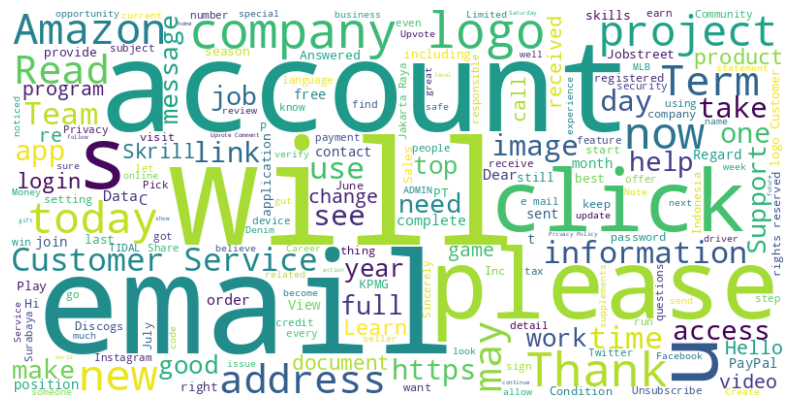

In [61]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv("email.csv")

# Display the first few rows of the dataset
print("Sample of the dataset:")
print(df.head())

# Preprocess the text data
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['processed_text'] = df['text'].apply(lambda x: preprocess_text(x))
df['processed_text'] = df['processed_text'].apply(lambda x: [word for word in x if word not in stop_words])

# Word frequency analysis for spam emails
spam_text = ' '.join(df[df['type'] == 'spam']['processed_text'].sum())
spam_freq_dist = FreqDist(spam_text)

# Word frequency analysis for non-spam emails
non_spam_text = ' '.join(df[df['type'] == 'not spam']['processed_text'].sum())
non_spam_freq_dist = FreqDist(non_spam_text)

# Generate word clouds for spam and non-spam emails
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(spam_freq_dist)
non_spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(non_spam_freq_dist)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [62]:
import re

# Sample strings
sample_strings = [
    "john.doe@example.com",
    "/home/user/data/file.txt",
    "my_variable_name",
    "https://www.example.com/page",
    "ERROR: Division by zero"
]

# Regular expressions
email_regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
file_path_regex = r'^(\/[^\/]+)+$'
variable_name_regex = r'\b[a-zA-Z_][a-zA-Z0-9_]*\b'
url_regex = r'(https?|ftp):\/\/[^\s\/$.?#].[^\s]*'
error_message_regex = r'(error|Error|ERROR):.*'

# Test each regex against the sample strings
for string in sample_strings:
    print("String:", string)
    print("Email:", re.findall(email_regex, string))
    print("File Path:", re.findall(file_path_regex, string))
    print("Variable Name:", re.findall(variable_name_regex, string))
    print("URL:", re.findall(url_regex, string))
    print("Error Message:", re.findall(error_message_regex, string))
    print("="*30)


String: john.doe@example.com
Email: ['john.doe@example.com']
File Path: []
Variable Name: ['john', 'doe', 'example', 'com']
URL: []
Error Message: []
String: /home/user/data/file.txt
Email: []
File Path: ['/file.txt']
Variable Name: ['home', 'user', 'data', 'file', 'txt']
URL: []
Error Message: []
String: my_variable_name
Email: []
File Path: []
Variable Name: ['my_variable_name']
URL: []
Error Message: []
String: https://www.example.com/page
Email: []
File Path: []
Variable Name: ['https', 'www', 'example', 'com', 'page']
URL: ['https']
Error Message: []
String: ERROR: Division by zero
Email: []
File Path: []
Variable Name: ['ERROR', 'Division', 'by', 'zero']
URL: []
Error Message: ['ERROR']


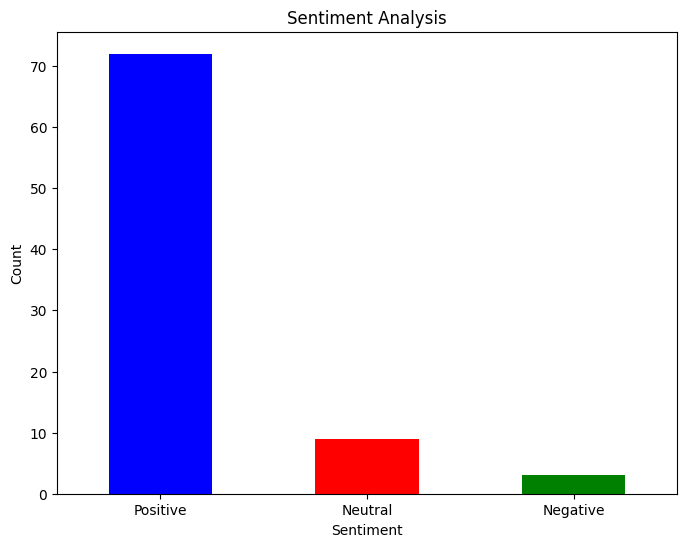

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load the dataset
data = pd.read_csv("email.csv")

# Define a function to perform sentiment analysis
def get_sentiment(text):
    # Use TextBlob to analyze sentiment
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    # Classify sentiment based on polarity score
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each text entry in the dataset
data['sentiment'] = data['text'].apply(get_sentiment)

# Count the number of occurrences of each sentiment category
sentiment_counts = data['sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['blue', 'red', 'green'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
